<a href="https://colab.research.google.com/github/Amjadkp/Deep_Learning_Lab/blob/main/optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training with SGD...
Training with Adagrad...
Training with Adadelta...
Training with RMSprop...
Training with Adam...


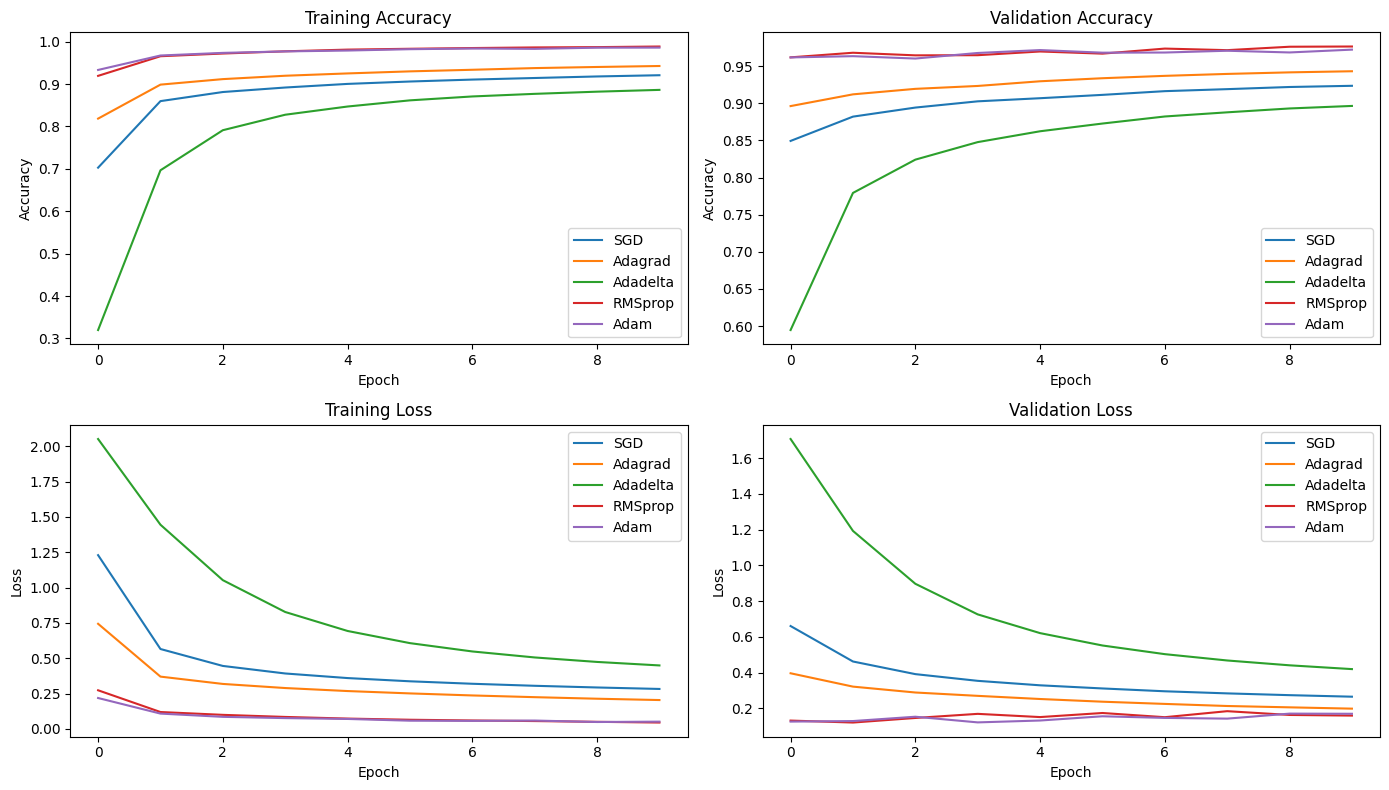

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop,Adam


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


def create_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Adagrad': Adagrad(learning_rate=0.01),
    'Adadelta': Adadelta(learning_rate=0.01),
    'RMSprop': RMSprop(learning_rate=0.01),
    'Adam' :  Adam(learning_rate=0.01)
}


history_dict = {}
for name, optimizer in optimizers.items():
    print(f"Training with {name}...")
    model = create_model(optimizer)
    batch_size = 32
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test),
                        verbose=0)
    history_dict[name] = history.history


plt.figure(figsize=(14, 8))


plt.subplot(2, 2, 1)
for name in history_dict:
    plt.plot(history_dict[name]['accuracy'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(2, 2, 2)
for name in history_dict:
    plt.plot(history_dict[name]['val_accuracy'], label=name)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(2, 2, 3)
for name in history_dict:
    plt.plot(history_dict[name]['loss'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(2, 2, 4)
for name in history_dict:
    plt.plot(history_dict[name]['val_loss'], label=name)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()